In [1]:
!pip install scikeras

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop


In [4]:
from google.colab import files
upload=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
data=pd.read_csv('gas_turbines.csv')
data=data.iloc[:,[0,1,2,7]]
data

AT      AP      AH     TEY
0      6.8594  1007.9  96.799  114.70
1      6.7850  1008.4  97.118  114.72
2      6.8977  1008.8  95.939  114.71
3      7.0569  1009.2  95.249  114.72
4      7.3978  1009.7  95.150  114.72
...       ...     ...     ...     ...
15034  9.0301  1005.6  98.460  111.61
15035  7.8879  1005.9  99.093  111.78
15036  7.2647  1006.3  99.496  110.19
15037  7.0060  1006.8  99.008  110.74
15038  6.9279  1007.2  97.533  111.58

[15039 rows x 4 columns]

In [ ]:
data.isnull().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [ ]:
data.describe().style.background_gradient(cmap='gnuplot2_r')

In [ ]:
corr=data.corr()
corr

AT        AP        AH       TEY
AT   1.000000 -0.412953 -0.549432 -0.207495
AP  -0.412953  1.000000  0.042573  0.146939
AH  -0.549432  0.042573  1.000000 -0.110272
TEY -0.207495  0.146939 -0.110272  1.000000

<Axes: >

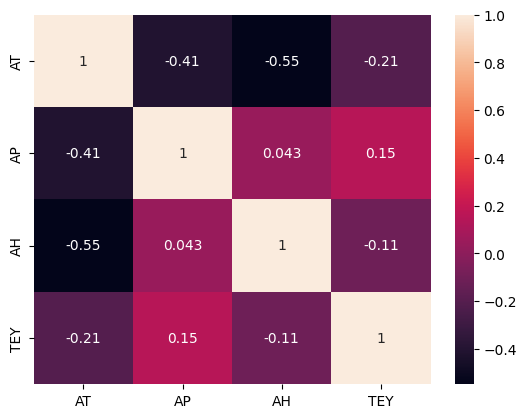

In [ ]:
import seaborn as sns
sns.heatmap(corr,annot=True)


In [ ]:
data['TEY'].nunique()

4207

In [ ]:
data['TEY'].max()

174.61

In [ ]:
data['TEY']=data['TEY'].apply(lambda x:1 if x>150 else 0)

In [ ]:
data['TEY'].unique()

array([0, 1])

<Axes: xlabel='TEY', ylabel='count'>

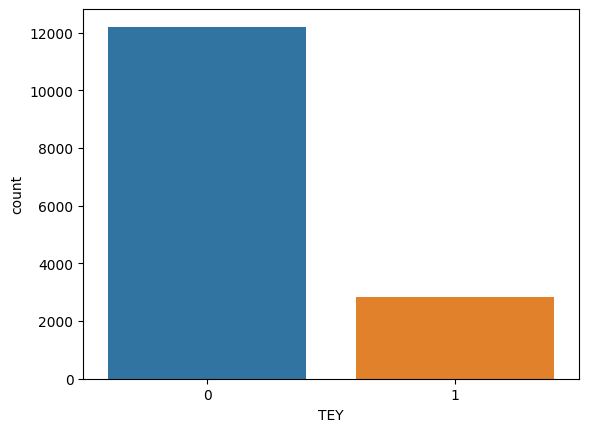

In [ ]:
sns.countplot(x=data['TEY'])

In [ ]:
data

AT      AP      AH  TEY
0      6.8594  1007.9  96.799    0
1      6.7850  1008.4  97.118    0
2      6.8977  1008.8  95.939    0
3      7.0569  1009.2  95.249    0
4      7.3978  1009.7  95.150    0
...       ...     ...     ...  ...
15034  9.0301  1005.6  98.460    0
15035  7.8879  1005.9  99.093    0
15036  7.2647  1006.3  99.496    0
15037  7.0060  1006.8  99.008    0
15038  6.9279  1007.2  97.533    0

[15039 rows x 4 columns]

In [ ]:
import plotly.express as px
px.histogram(data,x='TEY',y='AT',text_auto=True)

<ipython-input-149-61b63f080ce4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


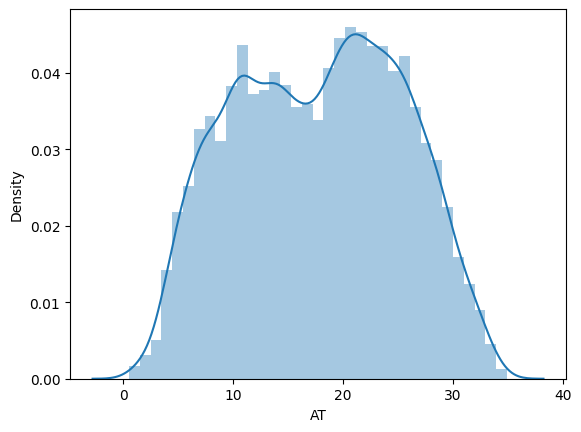

<ipython-input-149-61b63f080ce4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


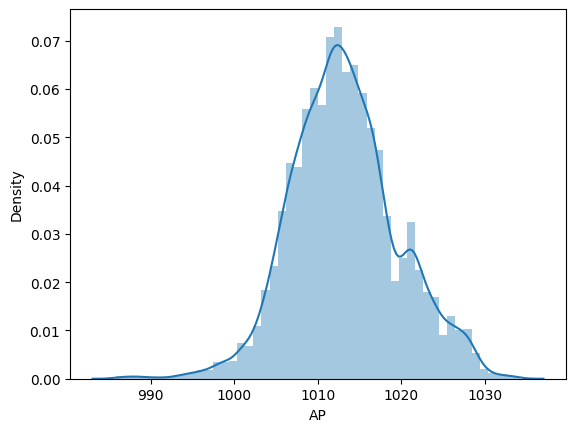

<ipython-input-149-61b63f080ce4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


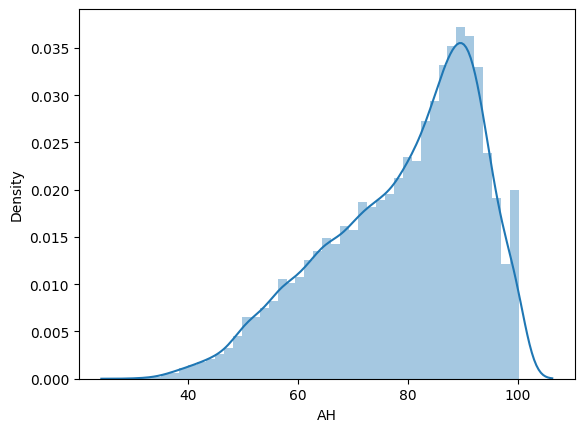

In [ ]:
columns=['AT','AP','AH']
for i in columns:
  plt.show()
  sns.distplot(data[i])

In [ ]:
fig=px.pie(data,values='AP',names="TEY",hover_data=['AP','TEY'],labels={'AP','TEY'})
fig.update_layout(title='<b> values lie between 0 and 1 for AP <b>',showlegend=True)
fig.show()

In [ ]:
fig=px.strip(data,x='TEY',y='AH',color='AH')
fig.show()

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
x_train.shape,x_test.shape

((10527, 3), (4512, 3))

In [ ]:
y_train.shape,y_test.shape

((10527,), (4512,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train

array([[0.13444474, 0.62978283, 0.8703964 ],
       [0.25025358, 0.64219235, 0.96997766],
       [0.57595468, 0.54084798, 0.94797508],
       ...,
       [0.59086457, 0.52637022, 0.90229792],
       [0.51236242, 0.57187177, 0.89855437],
       [0.3048447 , 0.69389866, 0.96170635]])

In [ ]:
x_test=scale.fit_transform(x_test)
x_test

array([[0.33359872, 0.54402185, 0.88105531],
       [0.27282997, 0.87182181, 0.59237574],
       [0.6283712 , 0.44526161, 0.62779146],
       ...,
       [0.68820053, 0.56923723, 0.68074324],
       [0.86959672, 0.51460391, 0.48342304],
       [0.32928326, 0.52090775, 0.98956425]])

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  optmizer =RMSprop(0.03)
  model.compile(loss='mean_squared_error',metrics='accuracy',optimizer=optmizer)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20]
epochs=[50,100,150,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.813 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ..........batch_size=10, epochs=50;, score=0.800 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ..........batch_size=10, epochs=50;, score=0.824 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ..........batch_size=10, epochs=50;, score=0.818 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ..........batch_size=10, epochs=50;, score=0.808 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=10, epochs=100;, score=0.813 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=10, epochs=100;, score=0.800 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=10, epochs=100;, score=0.824 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=10, epochs=100;, score=0.818 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=10, epochs=100;, score=0.808 total time= 2.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=10, epochs=150;, score=0.813 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=10, epochs=150;, score=0.800 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=10, epochs=150;, score=0.824 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=10, epochs=150;, score=0.818 total time= 3.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=10, epochs=150;, score=0.808 total time= 3.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=10, epochs=200;, score=0.813 total time= 4.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=10, epochs=200;, score=0.800 total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=10, epochs=200;, score=0.824 total time= 5.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=10, epochs=200;, score=0.818 total time= 4.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=10, epochs=200;, score=0.808 total time= 4.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ..........batch_size=20, epochs=50;, score=0.813 total time=  35.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ..........batch_size=20, epochs=50;, score=0.800 total time=  42.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ..........batch_size=20, epochs=50;, score=0.824 total time=  41.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ..........batch_size=20, epochs=50;, score=0.818 total time=  42.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ..........batch_size=20, epochs=50;, score=0.808 total time=  32.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=20, epochs=100;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=20, epochs=100;, score=0.800 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=20, epochs=100;, score=0.824 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=20, epochs=100;, score=0.818 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=20, epochs=100;, score=0.808 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=20, epochs=150;, score=0.813 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=20, epochs=150;, score=0.800 total time= 1.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=20, epochs=150;, score=0.824 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=20, epochs=150;, score=0.818 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=20, epochs=150;, score=0.808 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .........batch_size=20, epochs=200;, score=0.813 total time= 2.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .........batch_size=20, epochs=200;, score=0.800 total time= 2.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .........batch_size=20, epochs=200;, score=0.824 total time= 2.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .........batch_size=20, epochs=200;, score=0.818 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .........batch_size=20, epochs=200;, score=0.808 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print(result.best_score_,result.best_params_)

0.8123883576615167 {'batch_size': 10, 'epochs': 50}


**Tuning Hyperparameter:Dropout and Learing Rate**


In [ ]:
def create_model(dropout_rate,learning_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=10,epochs=20,dropout_rate=dropout_rate,learning_rate=learning_rate)
dropout_rate=[0.1,0.3]
learning_rate=[0.001,0.01]
param_grid=dict(dropout_rate=dropout_rate,learning_rate=learning_rate)
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.813 total time=  43.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.800 total time=  42.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.824 total time=  42.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.818 total time=  39.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.808 total time=  33.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.813 total time=  42.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.800 total time=  42.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.824 total time=  42.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.818 total time=  42.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.808 total time=  42.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.813 total time=  43.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.800 total time=  42.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.824 total time=  42.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.818 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.808 total time=  33.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.813 total time=  32.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.800 total time=  32.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.824 total time=  42.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.818 total time=  43.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END dropout_rate=0.3, learning_rate=0.01;, score=0.808 total time=  42.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print(result.best_params_,result.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.001} 0.8123883576615167


In [ ]:
def create_model(activation_Function,init):
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,activation_Function=['relu','tanh','softmax','linear'],
init=['zero','uniform','normal'])
param_grid=dict(activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result1=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=relu, init=zero;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=relu, init=zero;, score=0.800 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=relu, init=zero;, score=0.824 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=relu, init=zero;, score=0.818 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=relu, init=zero;, score=0.808 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=relu, init=uniform;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=relu, init=uniform;, score=0.800 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=relu, init=uniform;, score=0.824 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=relu, init=uniform;, score=0.818 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=relu, init=uniform;, score=0.808 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=relu, init=normal;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=relu, init=normal;, score=0.800 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=relu, init=normal;, score=0.824 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=relu, init=normal;, score=0.818 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=relu, init=normal;, score=0.808 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=tanh, init=zero;, score=0.813 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=tanh, init=zero;, score=0.800 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=tanh, init=zero;, score=0.824 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=tanh, init=zero;, score=0.818 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=tanh, init=zero;, score=0.808 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=tanh, init=uniform;, score=0.812 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=tanh, init=uniform;, score=0.799 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=tanh, init=uniform;, score=0.822 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=tanh, init=uniform;, score=0.821 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=tanh, init=uniform;, score=0.808 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=tanh, init=normal;, score=0.817 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=tanh, init=normal;, score=0.782 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=tanh, init=normal;, score=0.823 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=tanh, init=normal;, score=0.819 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=tanh, init=normal;, score=0.801 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=softmax, init=zero;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=softmax, init=zero;, score=0.800 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=softmax, init=zero;, score=0.824 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=softmax, init=zero;, score=0.818 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=softmax, init=zero;, score=0.808 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=softmax, init=uniform;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=softmax, init=uniform;, score=0.800 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=softmax, init=uniform;, score=0.824 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=softmax, init=uniform;, score=0.818 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=softmax, init=uniform;, score=0.808 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=softmax, init=normal;, score=0.813 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=softmax, init=normal;, score=0.800 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=softmax, init=normal;, score=0.824 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=softmax, init=normal;, score=0.818 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=softmax, init=normal;, score=0.808 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=linear, init=zero;, score=0.813 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=linear, init=zero;, score=0.800 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=linear, init=zero;, score=0.824 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=linear, init=zero;, score=0.818 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=linear, init=zero;, score=0.808 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END activation_Function=linear, init=uniform;, score=0.815 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END activation_Function=linear, init=uniform;, score=0.794 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END activation_Function=linear, init=uniform;, score=0.811 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END activation_Function=linear, init=uniform;, score=0.820 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END activation_Function=linear, init=uniform;, score=0.794 total time= 1.2min


In [ ]:
print(result1.best_params_,result1.best_score_)

{'activation_Function': 'tanh', 'init': 'uniform'} 0.8124834597677036


In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='uniform',activation='tanh'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
1053/1053 [==============================] - 4s 2ms/step - loss: 0.4865 - accuracy: 0.8124
Epoch 2/50
1053/1053 [==============================] - 3s 3ms/step - loss: 0.4371 - accuracy: 0.8123
Epoch 3/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4332 - accuracy: 0.8119
Epoch 4/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4267 - accuracy: 0.8120
Epoch 5/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4246 - accuracy: 0.8109
Epoch 6/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4293 - accuracy: 0.8113
Epoch 7/50
1053/1053 [==============================] - 3s 3ms/step - loss: 0.4173 - accuracy: 0.8119
Epoch 8/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4262 - accuracy: 0.8117
Epoch 9/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4263 - accuracy: 0.8120
Epoch 10/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.435

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7eebe366d1b0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [ ]:
y_pred_train=model.predict(X_train)

1053/1053 [==============================] - 4s 3ms/step


In [ ]:
y_pred_test=model.predict(x_test)

452/452 [==============================] - 2s 4ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8552
           1       0.00      0.00      0.00      1975

    accuracy                           0.81     10527
   macro avg       0.41      0.50      0.45     10527
weighted avg       0.66      0.81      0.73     10527



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_train,y_pred_train)

0.8123871948323359

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3651
           1       0.00      0.00      0.00       861

    accuracy                           0.81      4512
   macro avg       0.40      0.50      0.45      4512
weighted avg       0.65      0.81      0.72      4512



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test,y_pred_test)

0.8091755319148937